In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows',1000)

In [2]:
import sqlite3
conn = sqlite3.connect('sqlite-database.db')
contributions = pd.read_sql_query("SELECT * from github_contribution", conn, parse_dates=["date"])


In [3]:
first = min(contributions.date)
contributions["age"] = ((contributions.date - first).dt.days) / 30
contributions["age"] = contributions["age"].round(0)

In [4]:
authors = contributions[["date"]].groupby([contributions.author, contributions.identifier]).count().reset_index() \
  .groupby("author").count().sort_values("identifier", ascending=False).head(50).index.values

In [5]:
authors = authors[(authors != 'genericqa')]
authors = authors[(authors != 'hadoopqa')]
authors = authors[(authors != 'hudson')]

In [6]:
selection = contributions[contributions.author.isin(authors)]

In [7]:
author_first = selection[["author","age"]].groupby(["author"]).min().sort_values("age").rename(columns={"age":"first"})

In [8]:
c = selection[["author","identifier","age"]].groupby(["author","identifier","age"]).count().reset_index()
c = c.groupby(["author","age"]).count()
c = pd.merge(c,author_first,right_index=True, left_index=True).reset_index()
c = c.sort_values("first", ascending=False).reset_index()

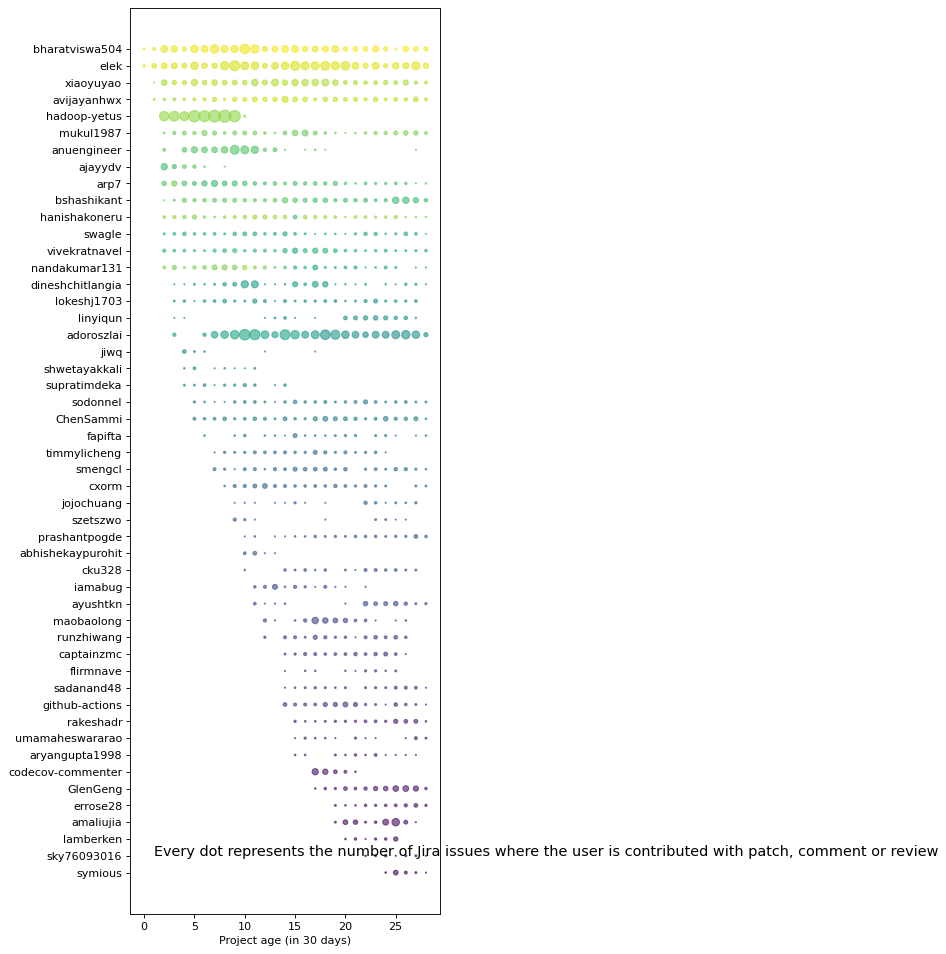

In [9]:
plt.figure(figsize=(5,15), dpi= 80)
plt.scatter(c.age, c.author, alpha=.6, s=c.identifier, c=c.index.values)
# plt.title('Period of contributions of Apache Hadoop contributors\n\fontsize{14}{3em}{asd}', loc="left", fontsize=20)
# plt.rc('text', usetex=True)
# plt.title(r'\fontsize{30pt}{3em}\selectfont{}{Mean WRFv3.5 LHF}\fontsize{12pt}{3em}\selectfont{}{Mean WRFv3.5 LHF}', loc="left")
plt.text(1, 1, 'Every dot represents the number of Jira issues where the user is contributed with patch, comment or review', fontsize=13, ha='left')
plt.xlabel('Project age (in 30 days)')

plt.show()
